In [27]:
#import von beautiful soup und requests um daten aus html zu extrahieren
from bs4 import BeautifulSoup as bs
import requests

#liste der adressen. es wär auch möglich die gesamte liste durchzulaufen.
orte=["https://www.gkd.bayern.de/de/grundwasser/oberesstockwerk/kelheim/johanneskirchen-kpa-222-16277/messwerte/tabelle","https://www.gkd.bayern.de/de/grundwasser/oberesstockwerk/isar/muenchen-u8-406-16705/gesamtzeitraum/tabelle",
      "https://www.gkd.bayern.de/de/grundwasser/oberesstockwerk/isar/muenchen-u8-406-16705/messwerte/tabelle", "https://www.gkd.bayern.de/de/grundwasser/oberesstockwerk/isar/garching-2-16282/gesamtzeitraum/tabelle"]
#auswahl eines standorts
response = requests.get(orte[1])
#abfrage der internetseite. 
wp = response.text
soup = bs(wp, "html.parser")
a= soup.find_all(True, {'class':["row","row2"]})
b = []
date = []
#extraktion der daten aus den html-wrappern
for item in a:
  b.append(item.getText())
b = b[2:]
ws = []
for item in b:
  ws.append(item[-6:])
wasserstand = ws
for item in date:
  date.append
for item in b:
  date.append(item[:10])
#extraktion des titels
a1 = soup.find(name="h1").getText()

In [28]:
#pandas und plt für die datenverarbeitung und plotten
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import WeekdayLocator

In [29]:
#filtern fehlerhafter daten und artefakte  (titel etc mit gleichen html tag wie die daten)
ws2 = []
date2=[]
#konvertierung deutscher kommazahlen in engl. "."-zahlen
for item in range(0, len(ws)):
    if "," in ws[item]:
      ws[item] = ws[item].replace(",",".")
      ws[item] = float(ws[item])
      ws2.append(ws[item])
      date2.append(date[item])
    else:
      pass


In [30]:
#dataframe anlegen
df = pd.DataFrame(columns =["Datum", "Wasserstand"])

In [31]:
#zuweisung der listen zum dataframe sowie konvertierung des datums ins datetime format
df.Datum = date2
df.Wasserstand = ws2
df.Datum = pd.to_datetime(df.Datum)

In [32]:
#sortieren der daten nach dem datum
df.sort_values(by="Datum", ascending=True, inplace= True)

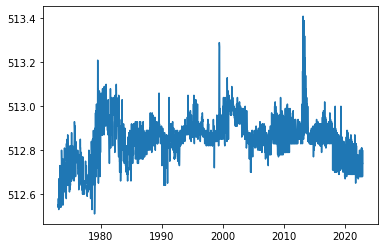

In [33]:
#erster blick auf den plot
plt.plot(df.Datum, df.Wasserstand)

In [34]:
#überprüfung der länge des datensatzes
len(df.Datum)

6873

Text(0.5, 1.0, 'Gesamtzeitraum München U8 406')

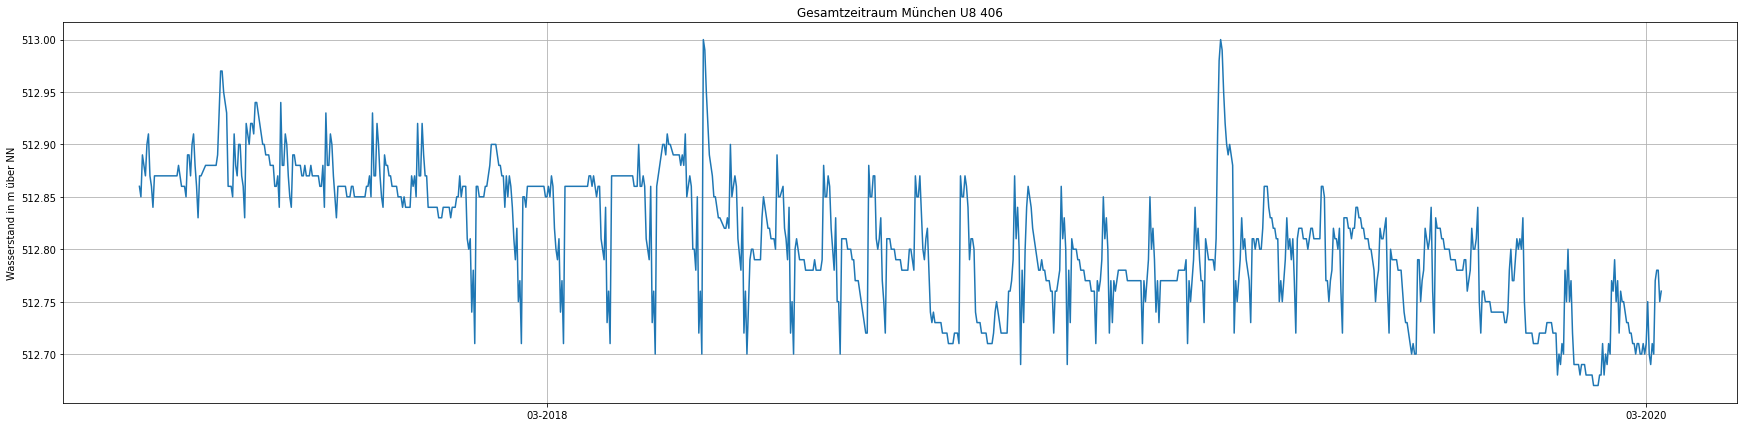

In [36]:
#genauere ausarbeitung des plots

ax = plt.gca()
ax2 = plt.gca()
#darstellung des plots von eintrag an der stelle l1 bis l2 
l1 = 5000
l2= 6000 
ax.plot(df.Datum[l1:l2], df.Wasserstand[l1:l2])
#ax2.plot(df.Datum[:5000], df.Wasserstand[:5000])
ax.grid()
fig = plt.gcf()
#dargestellte länge sollte man noch dynamisch darstellen lassen, evtl plot über mehrere tage mitteln 
fig.set_size_inches(30,7)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=24))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
ax.set_ylabel("Wasserstand in m über NN")
ax.set_title(a1)